C:\Users\Kingster\AppData\Local\Temp\ipykernel_15232\3895705104.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(data2).show()
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ADF test statistic:  -5.703952138368136
ADF test p-value:  7.56347629056552e-07
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   64
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  50.021
Date:                Mon, 07 Nov 2022   AIC                            -94.041
Time:                        15:05:40   BIC                            -87.660
Sample:                             0   HQIC                           -91.536
                                 - 64                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.6781      0.104    -16.106      0.000      -1.882      -1.474
ma.L2          0.6986      0.107      6.551      0.

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


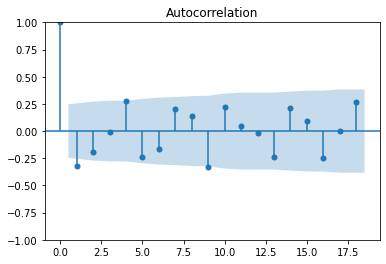

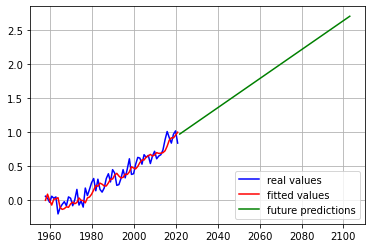

In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt

cs = pd.read_csv("temperature.csv")
tempArr = []
for i in cs["Degrees C"]:
    tempArr.append(i)
yr = []
for i in range(1958,2022):
    yr.append(i)
data = pd.Series(tempArr,index = yr)
data2 = np.diff(data,1)
plot_acf(data2).show()
print("ADF test statistic: ",ADF(data2)[0])
print("ADF test p-value: ",ADF(data2)[1])
# print("LB test: ",acorr_ljungbox(data2,lags=1))

# bic_matrix = []
# for p in range(7):
#     temp = []
#     for q in range(7):
#         try:
#             temp.append(ARIMA(data,order=(p,2,q)).fit().bic)
#         except:
#             temp.Append(None)
#     bic_matrix.append(temp)
# print(bic_matrix)

#(0,1,1)

model = ARIMA(data,order=(0,2,2)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data,color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")

this = model.forecast(82)
temp = []
for i in this:
    temp.append(i)
temp2 = []
for i in range(2022,2104):
    temp2.append(i)
forc = pd.Series(temp,index=temp2)
ax.plot(forc, color="green",label="future predictions")

plt.legend(loc="lower right")